
Trial 1 for density level 10.00%
Trial 1: Average Lanczos Basis Size: 294.0

Trial 2 for density level 10.00%
Trial 2: Average Lanczos Basis Size: 185.0

Trial 3 for density level 10.00%
Trial 3: Average Lanczos Basis Size: 150.33333333333334

Trial 4 for density level 10.00%
Trial 4: Average Lanczos Basis Size: 143.5

Trial 5 for density level 10.00%
Trial 5: Average Lanczos Basis Size: 136.0

Trial 6 for density level 10.00%
Trial 6: Average Lanczos Basis Size: 124.16666666666667

Trial 7 for density level 10.00%
Trial 7: Average Lanczos Basis Size: 114.85714285714286

Trial 8 for density level 10.00%
Trial 8: Average Lanczos Basis Size: 111.875

Trial 9 for density level 10.00%
Trial 9: Average Lanczos Basis Size: 136.88888888888889

Trial 10 for density level 10.00%
Trial 10: Average Lanczos Basis Size: 128.8

Trial 11 for density level 10.00%
Trial 11: Average Lanczos Basis Size: 123.0909090909091

Trial 12 for density level 10.00%
Trial 12: Average Lanczos Basis Size: 126.5

Tri

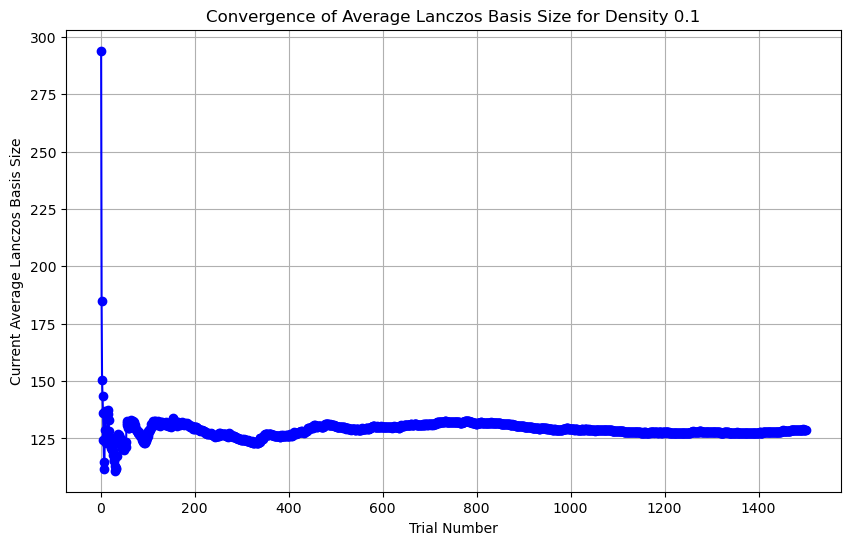

In [1]:
import numpy as np
from scipy.sparse import random as sparse_random
from scipy.sparse.linalg import eigsh
import matplotlib.pyplot as plt

def generate_sparse_matrix(size, density):
    diagonal_values = np.linspace(-1, 1, size)
    rvs = np.random.randn  
    upper = sparse_random(size, size, density=density/2, data_rvs=rvs, format='coo')
    matrix_s = upper + upper.T
    matrix_s.setdiag(diagonal_values)
    
    return matrix_s.tocsr()  

def lanczos_algorithm(matrix_s, initial_vector, expected_eigenvalue, tol=0, max_iter=10000):
    m = matrix_s.shape[0]
    krylov_vectors = np.zeros((m, max_iter + 1))
    tridiag_matrix = np.zeros((max_iter + 1, max_iter))
    w = initial_vector / np.linalg.norm(initial_vector)
    krylov_vectors[:, 0] = w
    
    for k in range(max_iter):
        v = matrix_s.dot(krylov_vectors[:, k])
        tridiag_matrix[k, k] = np.dot(krylov_vectors[:, k].conj(), v)
        v = v - tridiag_matrix[k, k] * krylov_vectors[:, k]
        if k > 0:
            v = v - tridiag_matrix[k, k-1] * krylov_vectors[:, k-1]
        tridiag_matrix[k + 1, k] = np.linalg.norm(v)
        if tridiag_matrix[k + 1, k] > tol:
            krylov_vectors[:, k + 1] = v / tridiag_matrix[k + 1, k]
        else:
            return k + 1
        
        eigenvalues = np.linalg.eigvalsh(tridiag_matrix[:k + 1, :k + 1])
        estimated_eigenvalue = eigenvalues[0]

        if abs(estimated_eigenvalue - expected_eigenvalue) < tol:
            return k + 1
        if estimated_eigenvalue <= expected_eigenvalue:
            return k + 1
    
    return max_iter

def trial_convergence_plot(size, density, initial_vector, max_trials=1500, tol=0, max_iter=10000):
    # To track the cumulative sum of iterations for each trial
    cumulative_iterations = 0
    avg_iterations = []
    
    for trial in range(1, max_trials + 1):
        print(f"\nTrial {trial} for density level {density:.2%}")
        matrix_s = generate_sparse_matrix(size, density)
        exact_eigenvalue, _ = eigsh(matrix_s, k=1, which='SA', tol=0)
        exact_eigenvalue = exact_eigenvalue[0]
        
        # Run Lanczos algorithm for this trial
        num_iterations = lanczos_algorithm(matrix_s, initial_vector, exact_eigenvalue, tol, max_iter)
        cumulative_iterations += num_iterations
        
        # Calculate current average iterations
        current_avg_iterations = cumulative_iterations / trial
        avg_iterations.append(current_avg_iterations)
        print(f"Trial {trial}: Average Lanczos Basis Size: {current_avg_iterations}")
    
    # Plot the result: Average Lanczos Basis Size vs Number of Trials
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, max_trials + 1), avg_iterations, marker='o', linestyle='-', color='b')
    plt.xlabel('Trial Number')
    plt.ylabel('Current Average Lanczos Basis Size')
    plt.title(f'Convergence of Average Lanczos Basis Size for Density {density}')
    plt.grid(True)
    plt.show()

# Parameters
size = 10000
density = 0.1  # Fixed density level for this task
initial_vector = np.random.rand(size)  # Random initial vector
max_trials = 1500  # Number of trials to observe convergence

# Plot convergence behavior
trial_convergence_plot(size, density, initial_vector, max_trials=max_trials)
